#importing libraries

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime

In [26]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [27]:
import seaborn as sns
import re

In [28]:
from nltk import bigrams,trigrams,word_tokenize,FreqDist
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.sentiment.vader

In [29]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from gensim.utils import simple_preprocess
# import gensim
# import gensim.corpora as corpora
# from gensim.models import CoherenceModel
# import spacy

In [30]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

Read the data

In [31]:
tweet_data=pd.read_csv('tweets_v8.csv')
tweet_data
# tweet_data.shape

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80014,Sale X Low,USA,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,NaN,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,NaN,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,Halloweentown 🎃,Creator of Stuff | Horror fan | Traveler | Bad...,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False


Sentiment Analysis

Lexicon Sentiment Analysis -TextBlob

In [32]:
stop_words=stopwords.words('english')
stop_words.extend(['squid','game'])

def clean_tweet(text,full_clean=False):
    le =WordNetLemmatizer()
    if type(text)==np.float64:
        return ""
    text=re.sub("'","",text)
    text = re.sub("\n", "", text)
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[()!?]', ' ', text)
    if full_clean:
      text = text.lower()
      text = re.sub("[^a-z0-9]"," ", text)
      text = [le.lemmatize(w) for w in text.split() if not (w in stop_words) and (len(w)>2)]
    else:
        text = re.sub("[^A-Za-z0-9]"," ", text)
        text = [le.lemmatize(w) for w in text.split() if (len(w)>2)]
    text = " ".join(word for word in text)
    return text

In [33]:
def textblob_sentiment(text):
    analysis=TextBlob(clean_tweet(text))
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"
    

In [34]:
def vader_sentiment(text):
    obj=SentimentIntensityAnalyzer()
    sentiment_dict=obj.polarity_scores(clean_tweet(text))
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <=-0.05:
        return "Negative"
    else:
        return "Neutral"

In [35]:
def sentiment_scores(text):
    obj=SentimentIntensityAnalyzer()
    sentiment_dict=obj.polarity_scores(clean_tweet(text))
    sentiment_dict['neg']=sentiment_dict['neg']*100
    sentiment_dict['neu']= sentiment_dict['neu']*100
    sentiment_dict['pos']=sentiment_dict['pos']*100
    lst=[sentiment_dict['neg'],sentiment_dict['neu'],sentiment_dict['pos']]
    return max(lst)


In [36]:
# def conf_matrix(x):
#   if x[1] == 1 and x[2] == 1:
#     return 'True Positive'
#   elif x[1] == 1 and x[2] == -1:
#     return 'False Ngative'
#   elif x[1] == -1 and x[2] == 1:
#     return 'False Positive'
#   elif x[1] == -1 and x[2] == -1:
#     return 'True Negative'
#   else:
#     return 0
    
# tweet_data['Conf_Matrix'] = tweet_data['text'].apply(lambda x: conf_matrix(clean_tweet(x)), axis=1)


In [37]:
I=56423
tweet_data['text'][I]

'#SquidGame is expected to generate $900M of revenue for $NFLX'

In [38]:
cleaned_tweet=clean_tweet(tweet_data['text'][I])
cleaned_tweet

'expected generate 900M revenue for NFLX'

In [39]:
textblob_sentiment(cleaned_tweet)

'Negative'

In [40]:
sentiment_scores(cleaned_tweet)
vader_sentiment(cleaned_tweet)

'Neutral'

In [41]:
tweet_data['TextBlob_Sentiment']=tweet_data['text'].apply(lambda x:textblob_sentiment(clean_tweet(x)))

In [42]:
tweet_data['VADER_Sentiment']=tweet_data['text'].apply(lambda x:vader_sentiment(clean_tweet(x)))

In [43]:
tweet_data['Sentiment_score']=tweet_data['text'].apply(lambda x:sentiment_scores(clean_tweet(x)))

In [44]:
tweet_data['TextBlob_Sentiment']

0        Negative
1         Neutral
2         Neutral
3        Negative
4        Negative
           ...   
80014     Neutral
80015    Negative
80016    Negative
80017    Negative
80018     Neutral
Name: TextBlob_Sentiment, Length: 80019, dtype: object

In [45]:
tweet_data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,TextBlob_Sentiment,VADER_Sentiment,Sentiment_score
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,Negative,Negative,60.4
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False,Neutral,Negative,50.8
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,Neutral,Neutral,100.0
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False,Negative,Negative,71.9
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,Negative,Negative,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80014,Sale X Low,USA,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False,Neutral,Positive,100.0
80015,RevAAA,NaN,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False,Negative,Neutral,100.0
80016,Omo K-Pop News,NaN,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False,Negative,Neutral,100.0
80017,🎃Pumpkin💀Queen 🕸,Halloweentown 🎃,Creator of Stuff | Horror fan | Traveler | Bad...,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False,Negative,Positive,80.6


In [46]:
data = tweet_data[['user_location','date','text','source','user_verified','is_retweet','TextBlob_Sentiment','VADER_Sentiment','Sentiment_score']]
data

,user_location,date,text,source,user_verified,is_retweet,TextBlob_Sentiment,VADER_Sentiment,Sentiment_score
0,NaN,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,False,Negative,Negative,60.4
1,NaN,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False,False,Neutral,Negative,50.8
2,NaN,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,False,Neutral,Neutral,100.0
3,Any pronouns,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False,False,Negative,Negative,71.9
4,France,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,False,Negative,Negative,58.8
...,...,...,...,...,...,...,...,...,...
80014,USA,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False,False,Neutral,Positive,100.0
80015,NaN,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False,False,Negative,Neutral,100.0
80016,NaN,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False,False,Negative,Neutral,100.0
80017,Halloweentown 🎃,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False,False,Negative,Positive,80.6


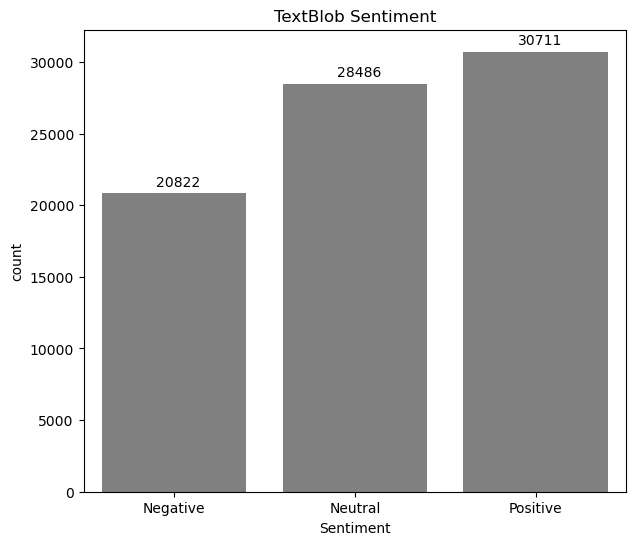

In [47]:
fig = plt.figure(figsize=(7,6))
ax = sns.countplot(x=data['TextBlob_Sentiment'],color='gray')
total = len(data['TextBlob_Sentiment'])
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 500
    ax.annotate(p.get_height(), (x, y), size = 10)
plt.xlabel('Sentiment')
plt.title('TextBlob Sentiment')
plt.savefig('textblobsentiment.png')
plt.show()

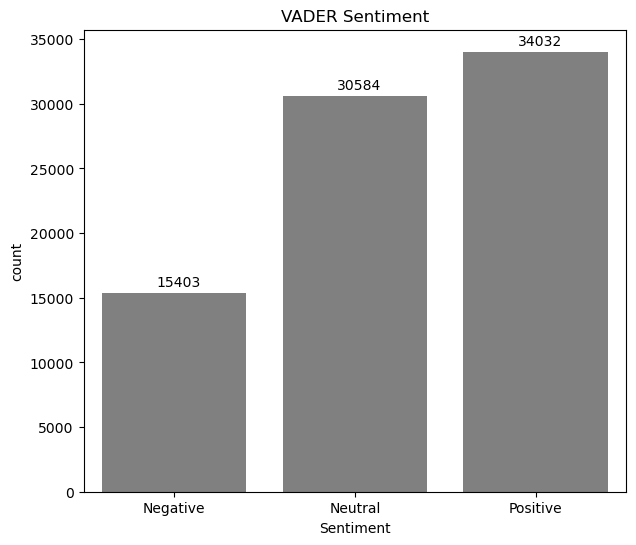

In [48]:
fig = plt.figure(figsize=(7,6))
ax = sns.countplot(x=data['VADER_Sentiment'],color='gray')
total = len(data['VADER_Sentiment'])
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 500
    ax.annotate(p.get_height(), (x, y), size = 10)
plt.xlabel('Sentiment')
plt.title('VADER Sentiment')
plt.show()

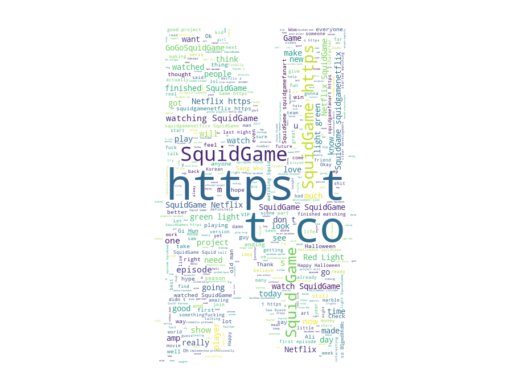

In [55]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open("netflix-n.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(' '.join(tweet_data['text']))
# create twitter image
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('netflix-n.jpg')
plt.show()